# **Question: 1**


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 - 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. [1.5 Marks] Plot the function for $$-2.5 \le x \le 1.5$$

b. [2 Marks] What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.2$.

c. [1.5 Marks] Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. [1.5 Marks] Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. [1.5 Marks] Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f'(x): 1.0 - 12.0·x - 6.0·x² - 10.0·x³ + 5.0·x⁴
Slope at x=0: 1.0


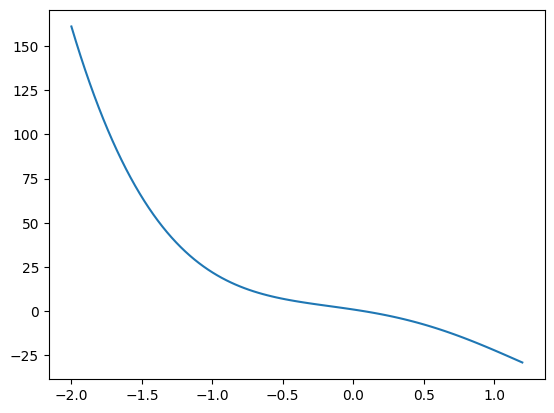

In [ ]:
#1a
f = Polynomial([2, 1, -6, -2, -2.5, 1])

f_prime = f.deriv(1)
print(f"f'(x): {f_prime}")
print(f"Slope at x=0: {f_prime(0)}")

#1b
x_arr = np.linspace(-2, 1.2, 100)
y_arr = f_prime(x_arr)

plt.plot(x_arr, y_arr)
plt.show()

In [ ]:
def forward_diff(f, h, x):
  return (f(x+h)-f(x))/h

def backward_diff(f, h, x):
  return (f(x)-f(x-h))/h

def central_diff(f, h, x):
  return (f(x+h)-f(x-h))/(2*h)

x = 0, -1.18625
print(f"Using forward differentiation:")
print(f"Slope at x = 0: {forward_diff(f, 0.2, 0)}")
print(f"Slope at x = -1.18625: {forward_diff(f, 0.2, -1.18625)}")
print()
print(f"Using backward differentiation:")
print(f"Slope at x = 0: {backward_diff(f, 0.2, 0)}")
print(f"Slope at x = -1.18625: {backward_diff(f, 0.2, -1.18625)}")
print()
print(f"Using central differentiation:")
print(f"Slope at x = 0: {central_diff(f, 0.2, 0)}")
print(f"Slope at x = -1.18625: {central_diff(f, 0.2, -1.18625)}")


Using forward differentiation:
Slope at x = 0: -0.2983999999999998
Slope at x = -1.18625: 26.940453553723128

Using backward differentiation:
Slope at x = 0: 2.1416
Slope at x = -1.18625: 41.748600030285616

Using central differentiation:
Slope at x = 0: 0.9216000000000002
Slope at x = -1.18625: 34.34452679200437


# **Question: 02**
Your phone has been losing charge far faster this week than last. You open its hidden system log and find only these four lines that mention screen-on time and the resulting battery drop:

```
1.0 hour screen-on time → 17 % lost  
3.5 hour screen-on time → 50 % lost  
4.0 hour screen-on time → 85 % lost
```
Later, a single extra line is appended:
```
5.0 hour screen-on time → 90 % lost
```
The log viewer refuses to draw a graph and the official battery-health tool is locked behind a server that is currently down.

All you have is the raw numbers and a sticky note on your desk that says:
<br></br>
<b><i>“Three (or more) exact readings → one unique predictive curve.”</i></b>
<br></br>
You want to know how much battery you would lose if you binge-scroll for **2.2** hours straight tonight.

### **a)** [3 Marks] Print the newton's basis for the polynomial constructed with the first three data points.
### **b)** [3 Marks] Now, write a function that adds new data to the previous data.
**[You are not allowed to hard code]**

In [ ]:
def calc_div_diff_matrix(x, y):
  difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)
  n = len(x)
  coeff = np.zeros((n,n))
  coeff[:,0] = y
  for i in range(1,n):
    for j in range(n-i):
      x1 = x[j]
      x2 = x[j+i]
      y1 = coeff[j, i-1]
      y2 = coeff[j+1, i-1]
      coeff[j,i] = difference(y2, y1, x2, x1)
  print(f"Newton's Basis: {coeff[0]}")
  return coeff

x = [1.0, 3.5, 4.0]
y = [17.0, 50.0, 85.0]

Matrix = calc_div_diff_matrix(x,y)
print(Matrix)


Newton's Basis: [17.         13.2        18.93333333]
[[17.         13.2        18.93333333]
 [50.         70.          0.        ]
 [85.          0.          0.        ]]


In [ ]:
def add_new_node(Matrix, new_x, new_y, x_existing):
  difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)
  n = len(x_existing)+1
  newMatrix = np.zeros((n,n))
  for i in range(n-1):
    newMatrix[:n-1,i] = Matrix[:,i]

  newMatrix[-1,0] = new_y

  for i in range(1,n):
    for j in range(n-i):
      if i == j:
        x1 = x[j]
        x2 = x[j+i]
        y1 = newMatrix[j, i-1]
        y2 = newMatrix[j+1, i-1]
        newMatrix[j,i] = difference(y2, y1, x2, x1)
  return newMatrix

new_x = 5.0
new_y = 99
Matrix_extended = add_new_node(Matrix, new_x, new_y, x)
print(Matrix_extended)

[[17.         13.2        18.93333333  0.        ]
 [50.         70.          0.          0.        ]
 [85.          0.          0.          0.        ]
 [99.          0.          0.          0.        ]]


## Question 3 **[4 + 2 marks]**


In Vandermonde matrix, the equation can be written as  $$\mathbf{Xa = y},$$
where in class we constructed, $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & \cdots & x_0^{n-1}  & x_0^n\\
x_1^0 & x_1^1 & \cdots & x_1^{n-1} & x_1^n\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n-1}^0 & x_{n-1}^1 & \cdots & x_{n-1}^{n-1}  & x_{n-1}^n\\
x_n^0 & x_{n}^1 & \cdots & x_n^{n-1} & x_n^n\\
\end{bmatrix}


**Now you have to implement the following matrix**

$\mathbf{X_{new}} = $
\begin{bmatrix}
x_n^n & x_{n}^{n-1} & \cdots & x_n^{1} & x_n^0\\
x_{n-1}^n & x_{n-1}^{n-1} & \cdots & x_{n-1}^{1} & x_{n-1}^{0}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_1^n & x_1^{n-1} & \cdots & x_1^{1} & x_1^{0}\\
x_0^n & x_0^{n-1} & \cdots & x_0^{1} & x_0^{0}\\
\end{bmatrix}

Write a **function** that takes **data_x** as parameter and populates the **$X_{new}$** matrix. Use **(52,-90), (-30,-140), (-100,-3), (0,1), (38,10), (79,42)** data points. Print the matrix, **$X_{new}$** from the given data.


Next, take the **diagonal** elements of your Vandermonde matrix to be the coefficients of an n-degree Polynomial. Consider element with index [0,0] to be the **last coefficient** and with index [n,n] to be the **first coefficient**. Print the Polynomial.

Hint: Use the Polynomial class of Numpy

In [ ]:
def createMatrix(data_x, data_y):
  n = len(data_x)
  X = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      X[n-i-1,n-j-1] = data_x[i]**j
  print(X)

  coeff = []
  for i in range(n):
    for j in range(n):
      if i == j:
        coeff.append(X[i,j])
  coeff.reverse()

  p = Polynomial(coeff)
  print(p)
data_x = [52, -30, -100, 0, 38, 79]
data_y = [-90, -140, -3, 1, 10, 42]

createMatrix(data_x, data_y)

[[ 3.07705640e+09  3.89500810e+07  4.93039000e+05  6.24100000e+03
   7.90000000e+01  1.00000000e+00]
 [ 7.92351680e+07  2.08513600e+06  5.48720000e+04  1.44400000e+03
   3.80000000e+01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.00000000e+10  1.00000000e+08 -1.00000000e+06  1.00000000e+04
  -1.00000000e+02  1.00000000e+00]
 [-2.43000000e+07  8.10000000e+05 -2.70000000e+04  9.00000000e+02
  -3.00000000e+01  1.00000000e+00]
 [ 3.80204032e+08  7.31161600e+06  1.40608000e+05  2.70400000e+03
   5.20000000e+01  1.00000000e+00]]
1.0 - 30.0·x + 10000.0·x² + 0.0·x³ + 2085136.0·x⁴ + (3.0770564e+09)·x⁵
